# The Disgusting Transmogriphier

This notebook will take your *disgusted* pictures and get them ready for our model to classify them. We will use the following steps:

1. We need to unzip the images from the `Student Uploads.zip` file.
2. We need to change them from 'JPEG' to 'JPG' format.
3. We need to resize them to 48x48 pixels.
4. We need to make them grayscale.

Let's get started!

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import sys
import random

# Import libraries for unzipping files
import zipfile

# Import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar

In [2]:
# Let's unzip the file

# Define the path to the file
data_path = "Student Uploads.zip"

# Define the path to the directory where the files will be extracted
extract_path = "Student Uploads"

# Check if the directory already exists
if not os.path.exists(extract_path):
    # If it does not exist, create it
    os.makedirs(extract_path)

# Unzip the file
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

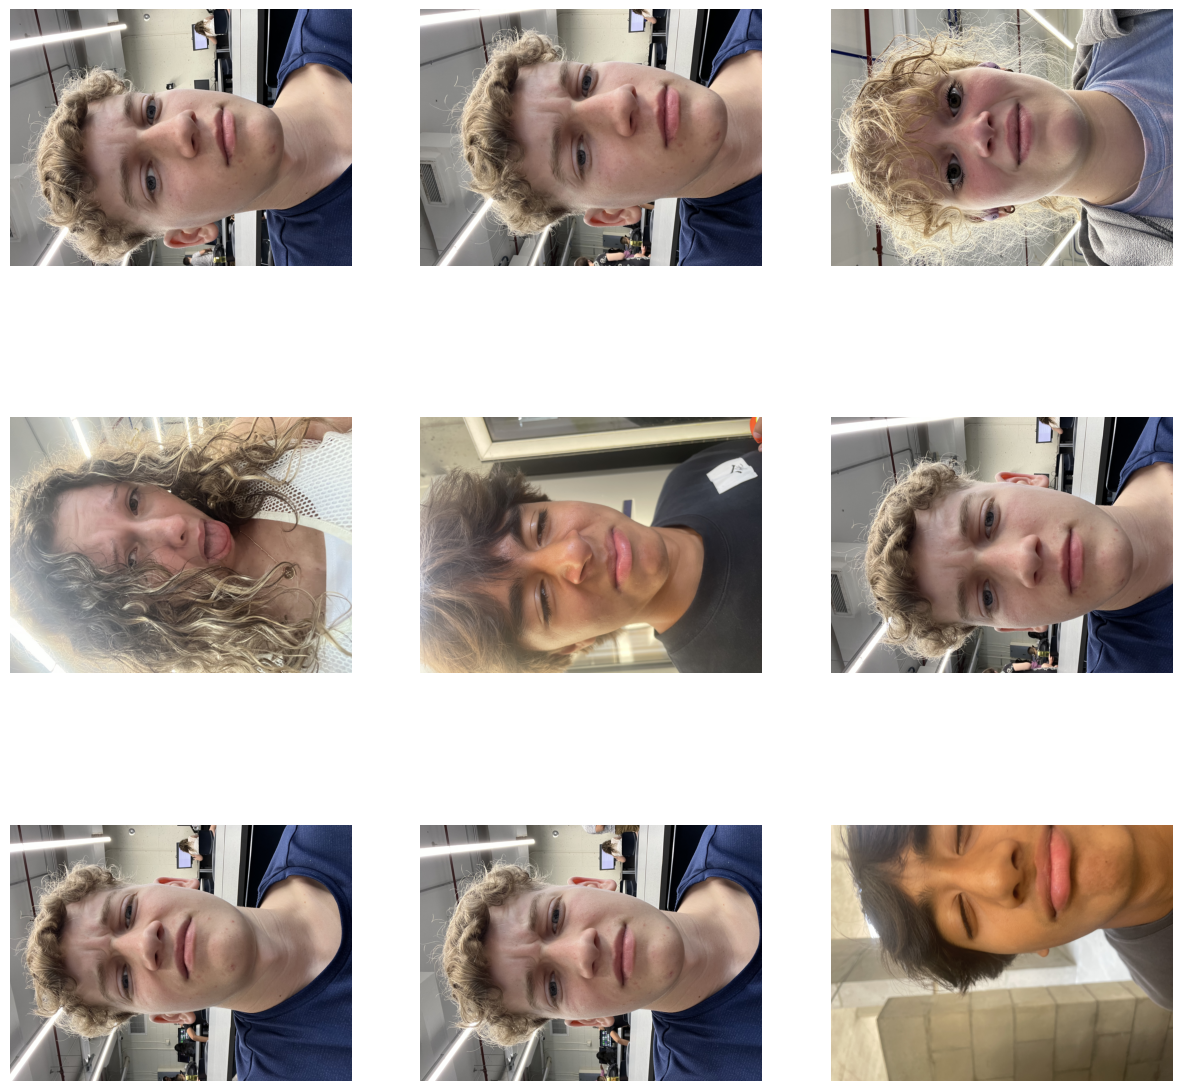

In [3]:
# Print 9 random pictures from the extracted files

# Get the list of files in the directory
first_file_list = os.listdir(extract_path)

# Define the number of pictures to display
num_pics = 9

def image_test(file_list, image_path, num_pics):
    # Create a figure
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    # Loop over the number of pictures to display
    for i in range(num_pics):
        # Get a random file
        file = random.choice(file_list)
        # Define the path to the file
        file_path = os.path.join(image_path, file)
        # Load the image
        img = plt.imread(file_path)
        # Get the axes
        ax = axs[i // 3, i % 3]
        # Plot the image
        ax.imshow(img)
        # Remove the axes
        ax.axis("off")

    # Display the figure
    plt.show()

# Call the function
image_test(first_file_list, extract_path, num_pics)


In [4]:
# Change the files to the JPG format

# Get the list of files in the directory
og_files = os.listdir(extract_path)

# Convert the list to a DataFrame
og_df_files = pd.DataFrame(og_files)

# Print 10 random file names
print(og_df_files.sample(10))


                                                     0
98                                  IMG_5555 Aadi.jpeg
130                               IMG_9211 Alyssa.jpeg
127                               IMG_9208 Alyssa.jpeg
113                     IMG_8264 Santiago Ordonez.jpeg
93                          IMG_5165 Amanda Russo.jpeg
49                                  IMG_2093 Liam.jpeg
62                                 IMG_3841 Julia.jpeg
129                               IMG_9210 Alyssa.jpeg
99                                  IMG_5556 Aadi.jpeg
31   C9D77F6C-0782-4215-B547-F90EB73DBB78 Prianka.jpeg


In [5]:
# We need to convert the files to the JPG format from any other format

# Define the path to the directory where the files will be saved
jpg_path = "Student Uploads JPG"

# Check if the directory already exists
if not os.path.exists(jpg_path):
    # If it does not exist, create it
    os.makedirs(jpg_path)

# Define the function to convert the files to the JPG format
def convert_to_jpg(file_list, image_path, jpg_path):
    # Loop over the files
    for file in file_list:
        # Define the path to the file
        file_path = os.path.join(image_path, file)
        # Load the image
        img = plt.imread(file_path)
        # Define the path to save the file
        jpg_file_path = os.path.join(jpg_path, file.split(".")[0] + ".jpg")
        # Save the image
        plt.imsave(jpg_file_path, img)

# Call the function
convert_to_jpg(og_files, extract_path, jpg_path)



In [6]:
# Print 10 random file names from the new directory
jpg_files = os.listdir(jpg_path)
jpg_df_files = pd.DataFrame(jpg_files)
print(jpg_df_files.sample(10))

                                                    0
3    132C509A-5061-4516-9F50-8EBEFA86CD4C Prianka.jpg
99                                  IMG_5553 Aadi.jpg
109                    IMG_5803 Thomas McLaughlin.jpg
33   D878ACDD-8F2C-43F1-A06A-803552B56A1B Prianka.jpg
36                              disgust_1920x1080.jpg
137                               IMG_9216 Alyssa.jpg
41                                  IMG_2084 Liam.jpg
64                                 IMG_3842 Julia.jpg
39     E8857339-4788-4320-9256-C6BE67C909ED Saige.jpg
87                                 IMG_4640 david.jpg


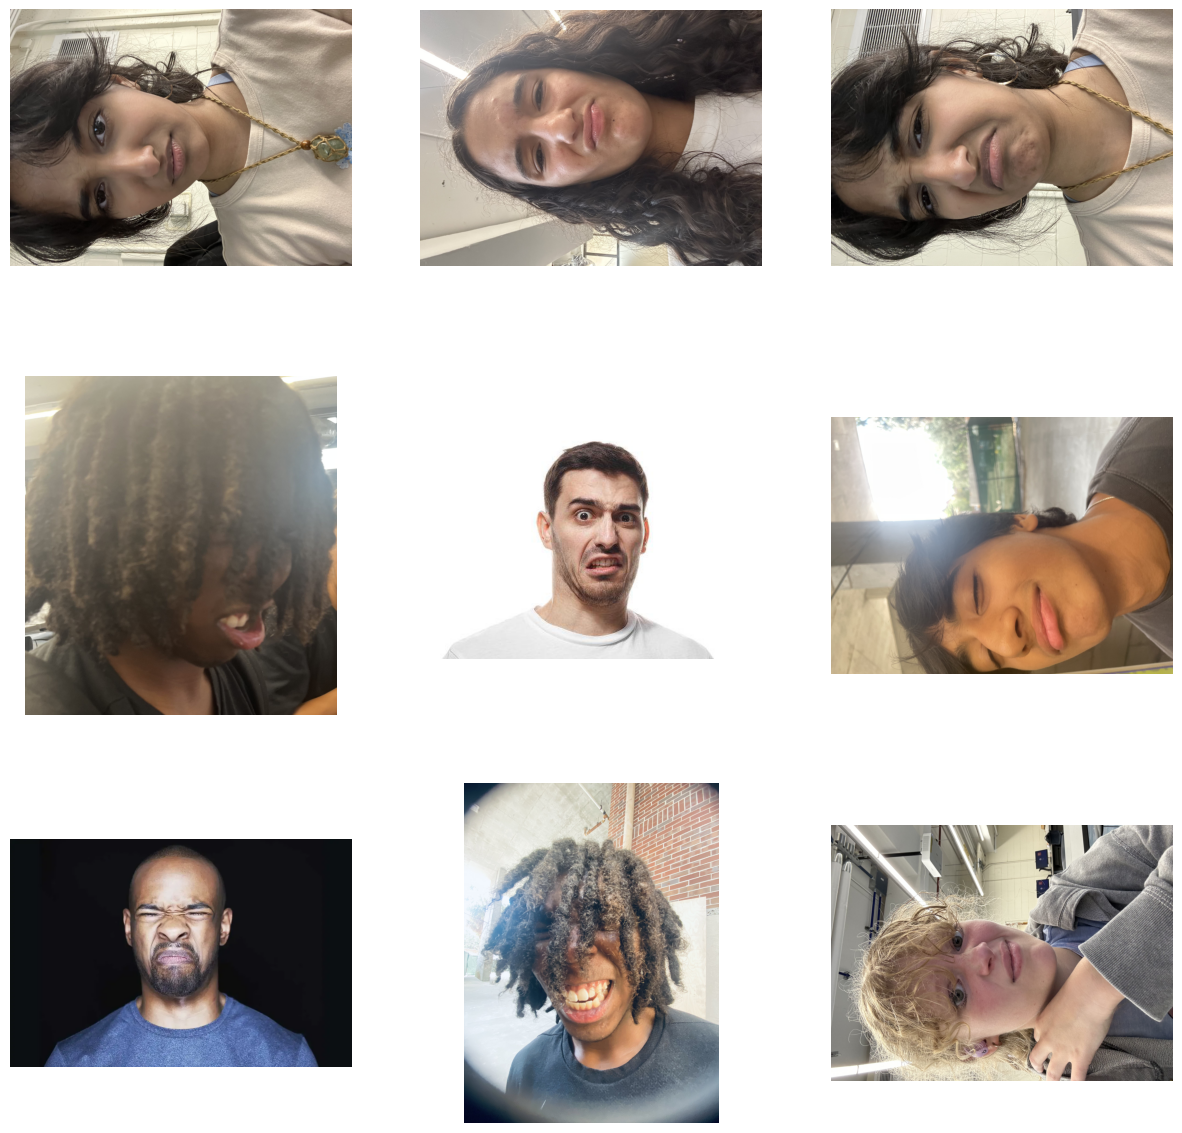

In [7]:
# Print 9 random pictures from the new directory
image_test(jpg_files, jpg_path, num_pics)


In [12]:
'''A lot of the images are sideways. We need to figure out which ones are wrong and rotate them. We *could* just do some simple math 
to figure out which ones are wider than they are tall, but that would miss the images that are sideways but still have the correct
dimensions. Instead, what if we used a facial recognition library to detect faces in the images and then rotated the images so that the 
faces were upright?'''

# Import a library for facial recognition
import cv2

# Define the path to the directory where the files will be saved
rotated_path = "Student Uploads Rotated"

# Check if the directory already exists
if not os.path.exists(rotated_path):
    # If it does not exist, create it
    os.makedirs(rotated_path)

# Define the function to rotate the images
def rotate_images(file_list, image_path, rotated_path):
    # Loop over the files
    for file in file_list:
        # Define the path to the file
        file_path = os.path.join(image_path, file)
        # Load the image
        img = cv2.imread(file_path)
        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Load the face detection model
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
        # Detect the faces in the image
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        # If there are faces in the image
        if len(faces) > 0:
            # Get the coordinates of the face
            x, y, w, h = faces[0]
            # Check if the width of the face is greater than the height
            if w > h:
                # Rotate the image
                img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
                # Define the path to save the file
                rotated_file_path = os.path.join(rotated_path, file)
                # Save the image
                cv2.imwrite(rotated_file_path, img_rotated)

# Call the function
rotate_images(jpg_files, jpg_path, rotated_path)

In [ ]:
#